# GROMACS 1400k-atom benchmark performance

This notebook compares the performance of the 1400k-atom GROMACS benchmark across different HPC systems.

Performance is measured in ns/day.

## Setup section

Import the required modules and define basic functions for reading the data from GROMACS output files and analysing it.

In [12]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [13]:
import sys
sys.path.append('../../../python-modules')

In [14]:
from appanalysis import gromacs

## Setup results files

In [15]:
archercpn = 24
archerfiles = {1:'../1400k-atoms/results/ARCHER/benchmark_1nodes24tasks1threads_201810051323.log',
               2:'../1400k-atoms/results/ARCHER/benchmark_2nodes48tasks1threads_201810051323.log',
               4:'../1400k-atoms/results/ARCHER/benchmark_4nodes96tasks1threads_201810051323.log',
               8:'../1400k-atoms/results/ARCHER/benchmark_8nodes192tasks1threads_201809291044.log',
               16:'../1400k-atoms/results/ARCHER/benchmark_16nodes384tasks1threads_201810051316.log',
               32:'../1400k-atoms/results/ARCHER/benchmark_32nodes768tasks1threads_201810051316.log'
              }

In [16]:
cirruscpn = 36
cirrusfiles = {1:'../1400k-atoms/results/Cirrus/benchmark_1nodes36tasks2threads_201810022015.log',
               2:'../1400k-atoms/results/Cirrus/benchmark_2nodes72tasks2threads_201810051340.log',
               4:'../1400k-atoms/results/Cirrus/benchmark_4nodes144tasks1threads_201810061940.log',
               8:'../1400k-atoms/results/Cirrus/benchmark_8nodes288tasks1threads_201810091024.log',
               16:'../1400k-atoms/results/Cirrus/benchmark_16nodes576tasks1threads_201810121258.log',
               32:'../1400k-atoms/results/Cirrus/benchmark_32nodes1152tasks1threads_201812140001.log'
               }

In [17]:
csd3scpn = 32
csd3sfiles = {1:'../1400k-atoms/results/CSD3-Skylake/benchmark_1nodes32tasks1threads_201812131453.log',
              2:'../1400k-atoms/results/CSD3-Skylake/benchmark_2nodes64tasks1threads_201812131541.log',
              4:'../1400k-atoms/results/CSD3-Skylake/benchmark_4nodes128tasks1threads_201812131646.log',
              8:'../1400k-atoms/results/CSD3-Skylake/benchmark_8nodes256tasks1threads_201812131751.log',
              16:'../1400k-atoms/results/CSD3-Skylake/benchmark_16nodes512tasks1threads_201812131735.log',
              32:'../1400k-atoms/results/CSD3-Skylake/benchmark_32nodes1024tasks1threads_201812131823.log'
             }

## Process data

In [18]:
archernodes, archerperf, archersu = gromacs.calcperf(archerfiles, archercpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              1              24           1.049            1.00
              2              48           2.090            1.99
              4              96           3.818            3.64
              8             192           7.005            6.68
             16             384          10.206            9.73
             32             768          17.897           17.06


In [19]:
cirrusnodes, cirrusperf, cirrussu = gromacs.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              1              36           1.699            1.00
              2              72           3.298            1.94
              4             144           6.279            3.70
              8             288          12.269            7.22
             16             576          23.822           14.02
             32            1152          25.001           14.72


In [20]:
csd3snodes, csd3sperf, csd3ssu = gromacs.calcperf(csd3sfiles, csd3scpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              1              32           2.481            1.00
              2              64           4.887            1.97
              4             128           9.413            3.79
              8             256          17.062            6.88
             16             512          26.685           10.76
             32            1024          48.443           19.53


## Performance comparison

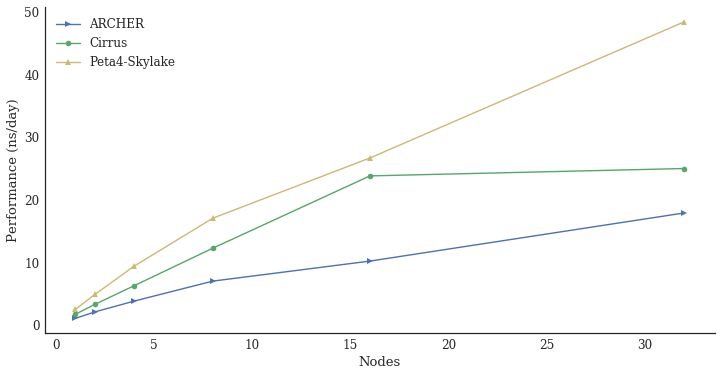

In [21]:
plt.plot(archernodes, archerperf, '>-', color=cols[0], label='ARCHER')
plt.plot(cirrusnodes, cirrusperf, 'o-', color=cols[1], label='Cirrus')
plt.plot(csd3snodes, csd3sperf, '^-', color=cols[4], label='Peta4-Skylake')
plt.xlabel('Nodes')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine()
plt.savefig('GROMACS_1400k_perf.png', dpi=300)

## Performance comparisons

### Single Node

JADE ressults from HEC BioSim. For full details see: http://www.hecbiosim.ac.uk/jade-benchmarks

In [22]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archerperf[0]
cperf['ARCHER'] = archerperf[0]/archercpn
nperf['Cirrus'] = cirrusperf[0]
cperf['Cirrus'] = cirrusperf[0]/cirruscpn
nperf['Peta4-Skylake'] = csd3sperf[0]
cperf['Peta4-Skylake'] = csd3sperf[0]/csd3scpn

print("Performance improvement relative to ARCHER:\n")
print("{:>30s} {:>15s} {:>15s}".format('System', 'Perf (ns/day)', 'Improvement'))
print("{:>30s} {:>15s} {:>15s}".format('======', '=============', '==========='))
print("Single node")
for system in nperf:
    print("{:>30s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf[system]/nperf['ARCHER']))
print("{:>30s} {:>15.3f} {:>15.3f} {:>45s}".format("JADE (5 core, 1 GPU)", 1.647, 1.647/nperf['ARCHER'], "http://www.hecbiosim.ac.uk/jade-benchmarks"))
print("{:>30s} {:>15.3f} {:>15.3f} {:>45s}".format("JADE (20 core, 4 GPU)", 1.469, 1.496/nperf['ARCHER'], "http://www.hecbiosim.ac.uk/jade-benchmarks"))

print("\n")

print("per-core")
for system in cperf:
    print("{:>20s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf[system]/cperf['ARCHER']))

Performance improvement relative to ARCHER:

                        System   Perf (ns/day)     Improvement
                        ======   =============     ===========
Single node
                        ARCHER           1.049           1.000
                        Cirrus           1.699           1.620
                 Peta4-Skylake           2.481           2.365
          JADE (5 core, 1 GPU)           1.647           1.570    http://www.hecbiosim.ac.uk/jade-benchmarks
         JADE (20 core, 4 GPU)           1.469           1.426    http://www.hecbiosim.ac.uk/jade-benchmarks


per-core
              ARCHER           0.044           1.000
              Cirrus           0.047           1.080
       Peta4-Skylake           0.078           1.774
